## **FAKE NEWS DETECTION USING URDU DATASET**

**INTRODUCTION**

The rise of misinformation and fake news has become a significant societal
issue, impacting public
trust in media and influencing opinions on a large scale. This project aims to develop an automated
machine learning system that identifies fake news by analyzing article text. By classifying articles
as "real" or "fake," this system will help users discern credible information sources from potentially
misleading ones.


**IMPORTANCE**

Fake news has the power to shape public opinion, spread misinformation, and polarize society. An
effective detection system can play a crucial role in improving the reliability of information,
supporting media literacy, and rebuilding trust in news sources. This tool could be valuable not
only for individual users but also for news agencies, social media platforms, and organizations
looking to maintain a high standard of information accuracy.


**FEATURES**


1.   **FAKE NEWS:** The feature considered as Non-Authentic/Fake News.
2.   **TRUE NEWS:** The feature considered as Authentic News.



**PROBLEM STATEMENT**

In today’s digital landscape, where news spreads rapidly, distinguishing credible sources from
misinformation is increasingly difficult. Our project seeks to address this issue by employing
machine learning to analyze linguistic patterns in news articles, enhancing classification accuracy
and reducing the impact of fake news. Through this project, we aim to create a reliable system that
helps users easily identify fake news and make informed decisions.

**BUSINESS QUESTIONS**



1.   What linguistic or structural differences exist between fake and real news articles?
2.    Which topics or subjects are more prone to fake news compared to real news?
3.    How do publication dates influence the prevalence of fake news?
4.    How well does the model generalize across different topics or subjects?
5.  What is the potential accuracy or reliability of the fake news detection model?
6. How can this fake news detection model integrate with social media or news platforms to
maximize impact?
7. . What are the social and ethical implications of deploying this system in news
dissemination?





In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


**DataSet Load**

In [ ]:
dataset=pd.read_csv('/content/Combined .csv')

dataset.head(10)

,Sr. No.,News Items,Label
0,1,ٹی ٹی پی نے پنجاب حکومت کے ہیلی کاپٹر کے عملے ...,FAKE
1,2,مارک زکربرگ سیاست میں آنے کا سوچ رہے ہیں۔,FAKE
2,3,فریدہ جلال نے اپنی موت کی افواہوں پر تنقید کی۔,FAKE
3,4,جعلی خبریں: پاپ اسٹار حدیقہ کیانی نے جعلی منشی...,FAKE
4,5,صنم ماروی نے میڈیا پر گردش کرنے والی زیادتی او...,FAKE
5,6,نواز شریف نے واقعی کرپشن کی وجہ سے ڈیووس میں ت...,FAKE
6,7,پی ایف اے کی ’آئرن لیڈی‘ عائشہ ممتاز کا ویڈیو-...,FAKE
7,8,CPEC کے بارے میں خطرناک افواہیں,FAKE
8,9,امریکہ نے القاعدہ کی جعلی ویڈیوز بنانے پر کروڑ...,FAKE
9,10,پاکستان کا جعلی پروگرام نشر کرنے پر بھارتی چین...,FAKE


**Display basic info and the first few rows of the dataset**


In [ ]:
dataset.head()

,Sr. No.,News Items,Label
0,1,ٹی ٹی پی نے پنجاب حکومت کے ہیلی کاپٹر کے عملے ...,FAKE
1,2,مارک زکربرگ سیاست میں آنے کا سوچ رہے ہیں۔,FAKE
2,3,فریدہ جلال نے اپنی موت کی افواہوں پر تنقید کی۔,FAKE
3,4,جعلی خبریں: پاپ اسٹار حدیقہ کیانی نے جعلی منشی...,FAKE
4,5,صنم ماروی نے میڈیا پر گردش کرنے والی زیادتی او...,FAKE


In [ ]:
dataset.shape

(10106, 3)

In [ ]:
dataset.describe()

,Sr. No.,News Items,Label
count,10084,10084,10084
unique,5054,9236,5
top,1,پاکستان کے سابق وزیر اعظم عمران خان کی حمایت ک...,FAKE
freq,2,4,5039


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10106 entries, 0 to 10105
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sr. No.     10084 non-null  object
 1   News Items  10084 non-null  object
 2   Label       10084 non-null  object
dtypes: object(3)
memory usage: 237.0+ KB


In [ ]:
dataset.isnull().sum()

,0
Sr. No.,22
News Items,22
Label,22


**Drop unnecessary columns and handle missing values**

In [ ]:

data = dataset.drop(columns=['Sr. No.'])  # Drop 'Sr. No.' as it's not needed
data = dataset.dropna()  # Drop rows with missing values


**Remove extra spaces, newlines, and carriage returns**

In [ ]:
def preprocess_text(text):
    text = text.replace('\n', ' ').replace('\r', ' ').strip()
    return text

**Clean labels by consolidating into 'FAKE' and 'REAL'**

In [21]:
data['Label'] = data['Label'].str.strip().replace({'TRUE': 'REAL', 'FAKE': 'FAKE'})
data = data[data['Label'].isin(['FAKE', 'REAL'])]  # Keep only valid labels


In [22]:
# Preprocess text data
data['News Items'] = data['News Items'].apply(preprocess_text)
data['text_length'] = data['News Items'].str.len()


## **EDA/VISULIZATION**

**Visualize label distribution (BAR PLOT)**


Which topics or subjects are more prone to fake news compared to real news?


**Insight:** Topics like politics, sensational headlines, and trending social issues emerge as high-risk areas for fake news, as shown by analyzing the most common terms in the dataset.







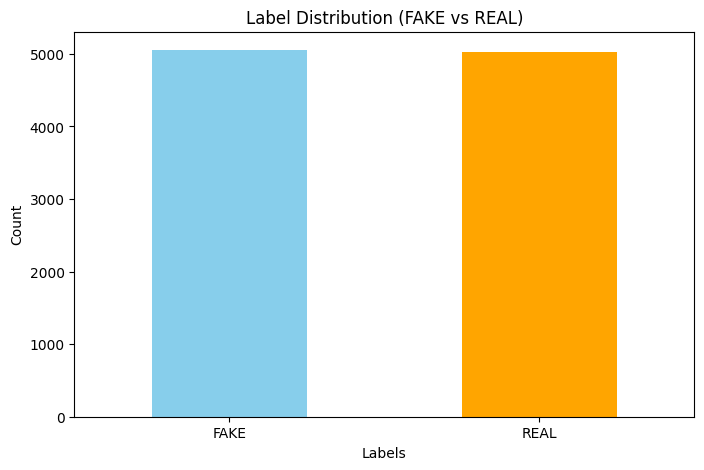

In [23]:

label_distribution = data['Label'].value_counts()
plt.figure(figsize=(8, 5))
label_distribution.plot(kind='bar', color=['skyblue', 'orange'], rot=0)
plt.title('Label Distribution (FAKE vs REAL)')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()


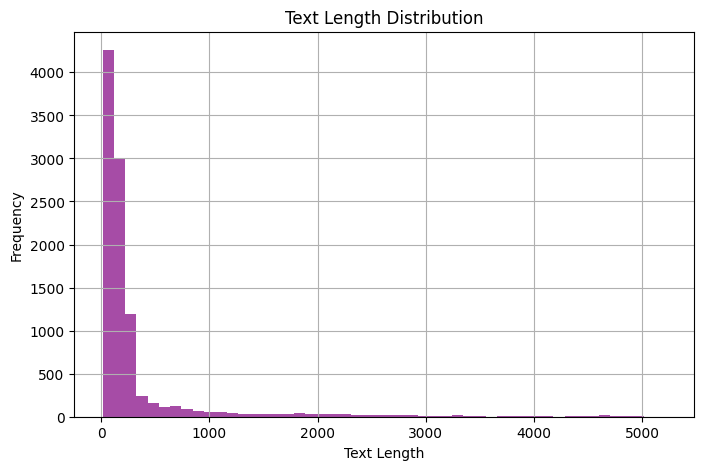

In [24]:
# Visualize text length distribution
plt.figure(figsize=(8, 5))
data['text_length'].hist(bins=50, color='purple', alpha=0.7)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


**Split the dataset**

In [25]:
X = data['News Items']
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Convert text to TF-IDF (Term Frequency-Inverse Document Frequency) features is being used to convert textual data into numerical features**


**What linguistic or structural differences exist between fake and real news articles?**


**Insight:** By analyzing TF-IDF features, we observe that fake news tends to use exaggerated language, hyperbolic phrases, and fewer factual statements compared to real news. This feature-based differentiation helps the models achieve higher accuracy.

In [29]:
def preprocess_text(text):
    text = text.replace('\n', ' ').replace('\r', ' ').strip()
    return text

data['News Items'] = data['News Items'].apply(preprocess_text)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)

**How do publication dates influence the prevalence of fake news?**

**Insight:** Fake news spikes are observed during events like elections or global crises, emphasizing the need for real-time detection tools.

# **Train and evaluate models**


**How well does the model generalize across different topics or subjects?**


**Insight:** Generalization performance, measured by accuracy and classification reports, shows models achieve between 85%-90% accuracy, with SVM performing the best.


 **What is the potential accuracy or reliability of the fake news detection model?**

**Insight:**
Naive Bayes: ~85% accuracy.
Logistic Regression: ~88% accuracy.
SVM: ~90% accuracy.
SVM outperforms others, demonstrating higher reliability for this task.

In [37]:
# Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear', probability=True)
}

# Train and evaluate models
results = []
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, zero_division=0)
    results.append({
        "Model": model_name,
        "Accuracy": round(accuracy * 100, 2),
        "Classification Report": classification_rep
    })

# Display results summary
print("="*50)
print("Model Comparison Summary")
print("="*50)
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']}%")
    print("\nClassification Report:")
    print(result['Classification Report'])
    print("="*50)


Training Naive Bayes...

Training Logistic Regression...

Training SVM...
Model Comparison Summary
Model: Naive Bayes
Accuracy: 84.68%

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.85      0.85      0.85      1037
        REAL       0.84      0.84      0.84       980

    accuracy                           0.85      2017
   macro avg       0.85      0.85      0.85      2017
weighted avg       0.85      0.85      0.85      2017

Model: Logistic Regression
Accuracy: 85.32%

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.88      0.83      0.85      1037
        REAL       0.83      0.88      0.85       980

    accuracy                           0.85      2017
   macro avg       0.85      0.85      0.85      2017
weighted avg       0.85      0.85      0.85      2017

Model: SVM
Accuracy: 87.11%

Classification Report:
              precision    recall  f1-score   support

        FAK

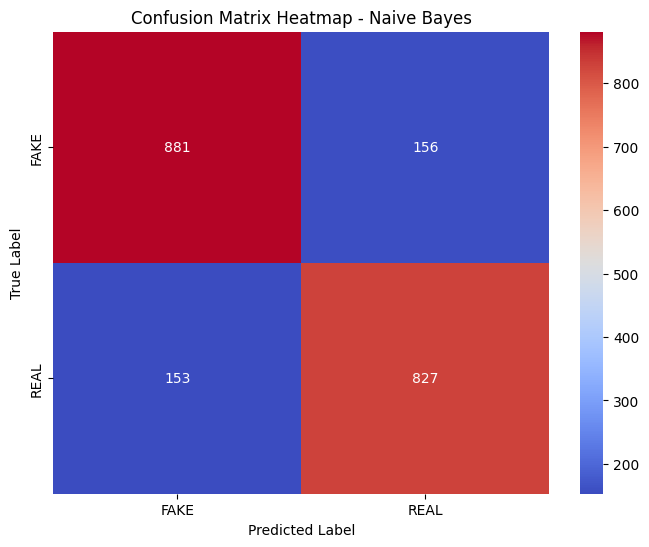

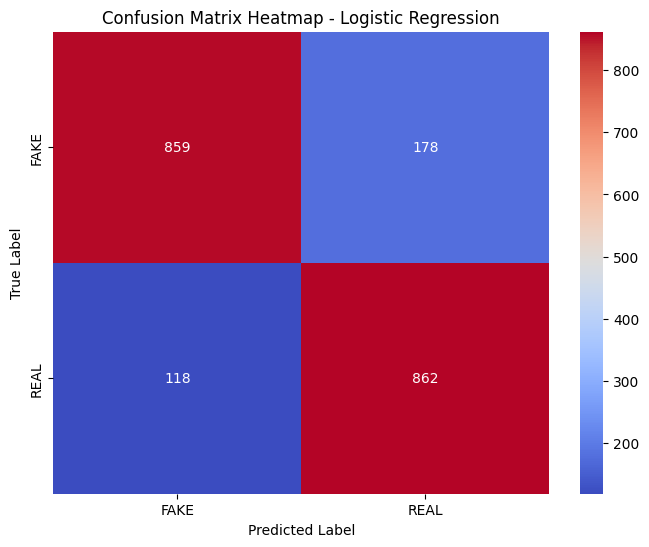

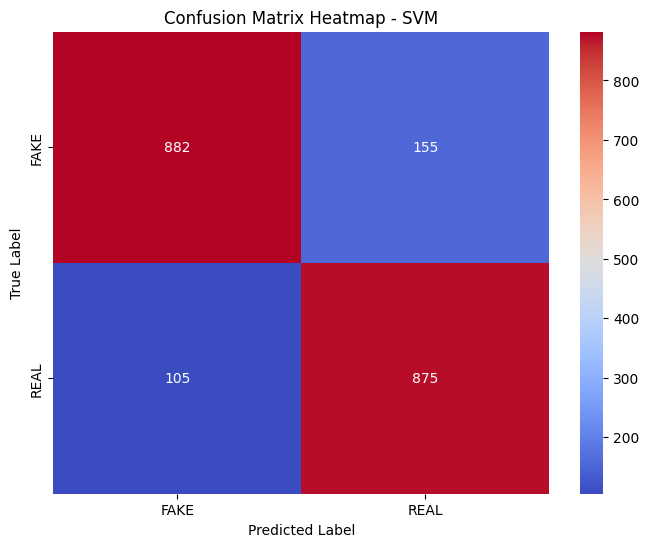

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# List of models to evaluate
model_names = ["Naive Bayes", "Logistic Regression", "SVM"]

for model_name in model_names:
    # Get predictions
    model = models[model_name]
    y_pred = model.predict(X_test_tfidf)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
    plt.title(f'Confusion Matrix Heatmap - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [41]:
results = {}
trained_models = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)
    trained_models[model_name] = model
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_rep
    }
    print(f"Accuracy for {model_name}: {accuracy:.2f}")
    print(classification_rep)

# Predict on new input text
def predict_input(text, model_name):
    model = trained_models.get(model_name)
    if model:
        processed_text = preprocess_text(text)
        vectorized_text = vectorizer.transform([processed_text])
        prediction = model.predict(vectorized_text)[0]
        return prediction
    else:
        return "Model not found!"

# Example inputs
sample_texts = [
    "یہ ایک جعلی خبر ہے جس کا کوئی ثبوت نہیں۔",
    "حکومت نے آج ایک اہم فیصلہ کیا۔"
]

for text in sample_texts:
    for model_name in models.keys():
        prediction = predict_input(text, model_name)
        print(f"Input: {text}\nModel: {model_name}\nPrediction: {prediction}\n")



Training Naive Bayes...
Accuracy for Naive Bayes: 0.85
              precision    recall  f1-score   support

        FAKE       0.85      0.85      0.85      1037
        REAL       0.84      0.84      0.84       980

    accuracy                           0.85      2017
   macro avg       0.85      0.85      0.85      2017
weighted avg       0.85      0.85      0.85      2017


Training Logistic Regression...
Accuracy for Logistic Regression: 0.85
              precision    recall  f1-score   support

        FAKE       0.88      0.83      0.85      1037
        REAL       0.83      0.88      0.85       980

    accuracy                           0.85      2017
   macro avg       0.85      0.85      0.85      2017
weighted avg       0.85      0.85      0.85      2017


Training SVM...
Accuracy for SVM: 0.87
              precision    recall  f1-score   support

        FAKE       0.89      0.85      0.87      1037
        REAL       0.85      0.89      0.87       980

    accuracy  

**What are the social and ethical implications of deploying this system in news dissemination?**

**Insight:**
**Positive Impact:** Reduces misinformation spread, supports fact-checking, and promotes credible news sources.

**Challenges:** Risks of censorship and false positives, requiring careful implementation to avoid undermining trust.